In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 222MB/s]
100% 1.06G/1.06G [00:08<00:00, 129MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [14]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2, padding ='valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2, padding ='valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
result = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.1531 - accuracy: 0.6037 - val_loss: 0.6062 - val_accuracy: 0.6722
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6055 - accuracy: 0.6878 - val_loss: 0.5279 - val_accuracy: 0.7440
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4923 - accuracy: 0.7617 - val_loss: 0.5460 - val_accuracy: 0.7254
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4205 - accuracy: 0.8099 - val_loss: 0.6134 - val_accuracy: 0.7308
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3739 - accuracy: 0.8335 - val_loss: 0.5387 - val_accuracy: 0.7516
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2823 - accuracy: 0.8804 - val_loss: 0.5078 - val_accuracy: 0.7968
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2191 - accuracy: 0.9082 - val_loss: 0.6825 - val_ac

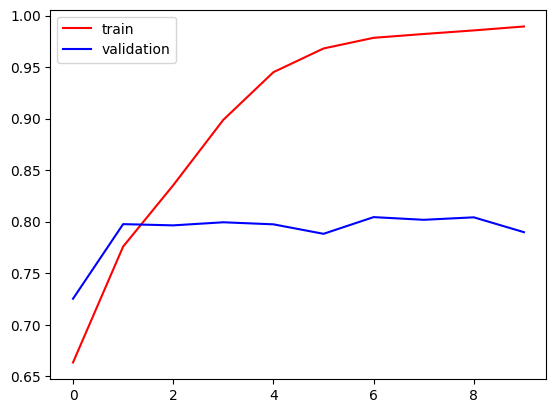

In [11]:
#Before Handling Overfitting
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], color = 'red', label = 'train')
plt.plot(result.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

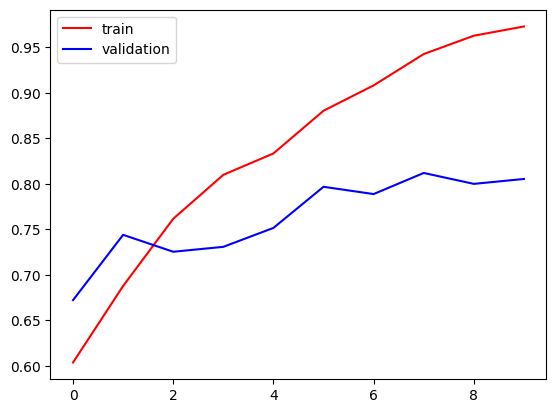

In [20]:
#After Handling Overfitting
plt.plot(result.history['accuracy'], color = 'red', label = 'train')
plt.plot(result.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

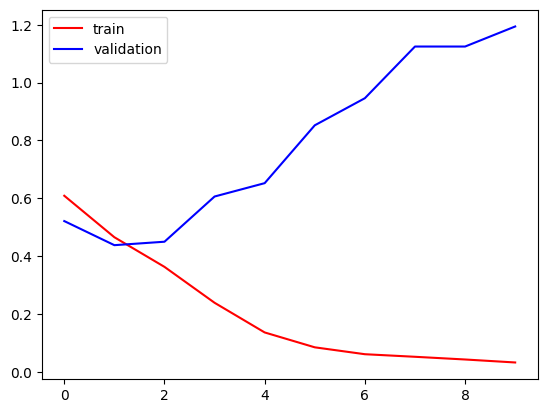

In [12]:
#Before Handling Overfitting
plt.plot(result.history['loss'], color = 'red', label = 'train')
plt.plot(result.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

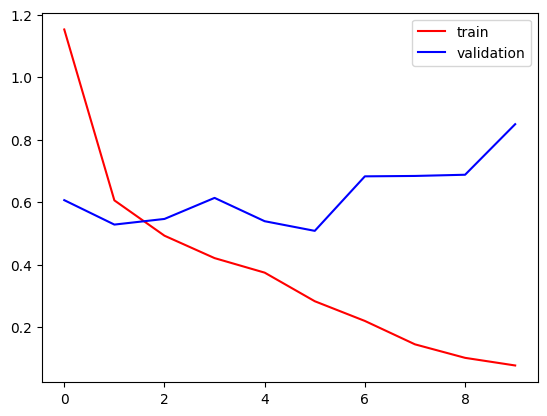

In [21]:
#After Handling Overfitting
plt.plot(result.history['loss'], color = 'red', label = 'train')
plt.plot(result.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

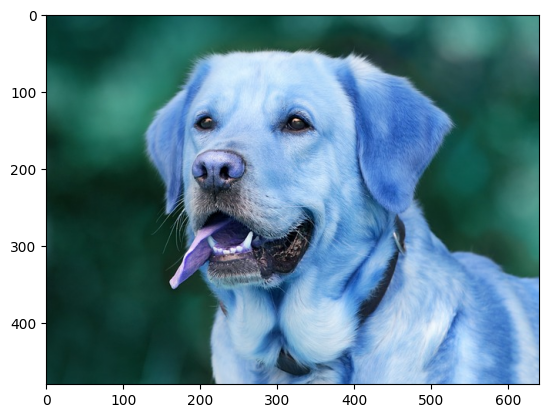

In [28]:
import cv2
test_img = cv2.imread('/content/Dog.jpg')
plt.imshow(test_img)

In [29]:
test_img.shape

(480, 640, 3)

In [30]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

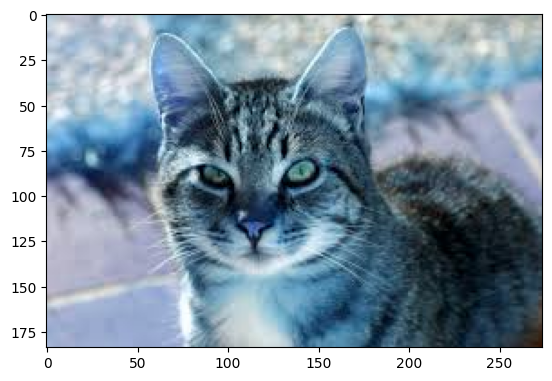

In [25]:
import cv2
test_img = cv2.imread('/content/Cat.jfif')
plt.imshow(test_img)

In [26]:
test_img.shape

(184, 274, 3)

In [27]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)